In [1]:
import pandas as pd
import numpy as np

# Econ 452 Data Work

Below will be the bulk of the data work that was done to create our dataset that will be used for the Diff in Diff regression model. The data work will be split up in different sections labelled with the sub heading for the type of data that will be worked on. Most of the data was found from the *United States Cenus Bureau*, which was then edited and put together here. 

Not all of the work was done in this notebook, some was also done, with Excel. Large sections that are commented off, were portions of code that was used to manipulate the data originally, but was then exported to Excel for further touches before being imported back into this notebook for final touches and merging. 

The outline of the data work, below, is in chronological order, where the later sections were newer datasets that were found and added to our final dataset. 

The final dataset was merged together and exported to Excel, where it will be imported into *Stata* for the actual regression analysis.

Please note that this work may be difficult to follow, as the process was continuously changing, with new ideas and new data.

# Election and Unemployment Data

Here we will begin with the election and unemployment data. 

The election data records federal level election results at County level. This dataset was found on MIT's Election Data Science Lab. The original dataset had election results for all counties in all states; Nebraska and Missouri were isolated for before being imported into Jupyter.

The unemployment data records unemployment levels over the years at the county level as well and was from the Bureau of Labor Statistics.

In [2]:
unemp_MO = pd.read_excel("unemp_MO.xlsx")
unemp_NE = pd.read_excel("unemp_NE.xlsx")
county_pres = pd.read_excel("countypres_NE_MO.xlsx")
county_pres

,year,state,state_po,county,candidate,party,candidatevotes,totalvotes
0,2000,MISSOURI,MO,ADAIR,AL GORE,DEMOCRAT,4101,10552
1,2000,MISSOURI,MO,ADAIR,GEORGE W. BUSH,REPUBLICAN,6050,10552
2,2000,MISSOURI,MO,ADAIR,RALPH NADER,GREEN,301,10552
3,2000,MISSOURI,MO,ADAIR,OTHER,OTHER,100,10552
4,2000,MISSOURI,MO,ANDREW,AL GORE,DEMOCRAT,2795,7274
...,...,...,...,...,...,...,...,...
4198,2020,NEBRASKA,NE,WHEELER,JO JORGENSEN,LIBERTARIAN,5,502
4199,2020,NEBRASKA,NE,WHEELER,DONALD J TRUMP,REPUBLICAN,438,502
4200,2020,NEBRASKA,NE,YORK,JOSEPH R BIDEN JR,DEMOCRAT,1630,7143
4201,2020,NEBRASKA,NE,YORK,JO JORGENSEN,LIBERTARIAN,176,7143


In [3]:
long_MO = unemp_MO.melt(id_vars=["county"])
long_MO.columns=["county", "year", "unemp"]

# long_MO.to_excel("unemp_MO_long.xlsx")
long_MO["state"] = "MISSOURI"

In [4]:
long_NE = unemp_NE.melt(id_vars=["county"])
long_NE.columns=["county", "year", "unemp"]

# long_NE.to_excel("unemp_NE_long.xlsx")
long_NE["state"] = "NEBRASKA"

In [5]:
unemp_county = pd.concat([long_MO, long_NE])
unemp_county

,county,year,unemp,state
0,ADAIR,2000,2.9,MISSOURI
1,ANDREW,2000,3.1,MISSOURI
2,ATCHISON,2000,2.6,MISSOURI
3,AUDRAIN,2000,3.0,MISSOURI
4,BARRY,2000,3.3,MISSOURI
...,...,...,...,...
553,WASHINGTON,2020,3.7,NEBRASKA
554,WAYNE,2020,2.8,NEBRASKA
555,WEBSTER,2020,3.8,NEBRASKA
556,WHEELER,2020,1.8,NEBRASKA


From above we can see that here, we are simply importing the data and reshaping it from a wide to a long format.

We then merge our unemployment data with the election data.

In [6]:
election_unemp = pd.merge(county_pres, unemp_county, how="left", on=["state", "county", "year"])
election_unemp

,year,state,state_po,county,candidate,party,candidatevotes,totalvotes,unemp
0,2000,MISSOURI,MO,ADAIR,AL GORE,DEMOCRAT,4101,10552,2.9
1,2000,MISSOURI,MO,ADAIR,GEORGE W. BUSH,REPUBLICAN,6050,10552,2.9
2,2000,MISSOURI,MO,ADAIR,RALPH NADER,GREEN,301,10552,2.9
3,2000,MISSOURI,MO,ADAIR,OTHER,OTHER,100,10552,2.9
4,2000,MISSOURI,MO,ANDREW,AL GORE,DEMOCRAT,2795,7274,3.1
...,...,...,...,...,...,...,...,...,...
4198,2020,NEBRASKA,NE,WHEELER,JO JORGENSEN,LIBERTARIAN,5,502,1.8
4199,2020,NEBRASKA,NE,WHEELER,DONALD J TRUMP,REPUBLICAN,438,502,1.8
4200,2020,NEBRASKA,NE,YORK,JOSEPH R BIDEN JR,DEMOCRAT,1630,7143,3.4
4201,2020,NEBRASKA,NE,YORK,JO JORGENSEN,LIBERTARIAN,176,7143,3.4


Putting the two merged unemployment and election dataframs together, we get election results and unemployment rates for Missouri and Nebraska at the county level.

# Demographic Data

Here we begin to add and work with demographic data, from the *United States Cenus Bureau*, that will be used as control variables in our Diff in Diff model.

For this section, you will see a large portion of commented code, this is because the data was first loaded into Python for manipulation, once the data was then exported out into Excel, for further manipulation before being imported back into Python.

This was primarily done because re-formatting strings was much easier in Excel then in Python.

Exporting to Excel.

Importing again.

In [7]:
demo2000 = pd.read_csv("demo2000.csv")
demo2020 = pd.read_csv("demo2020_edit.csv")
demo2016 = pd.read_csv("demo2016_edit.csv")
demo2012 = pd.read_csv("demo2012_edit.csv")
demo2010 = pd.read_csv("demo2010_edit.csv")
demo2008 = demo2010.copy()
demo2004 = demo2010.copy()
demo2000 = demo2010.copy()
demo0_8 = pd.read_csv("demo_2000_08.csv")
demo0_8

,state,county,year,White,Total_pop
0,MISSOURI,ADAIR,2000,24157,24960
1,MISSOURI,ANDREW,2000,16359,16530
2,MISSOURI,ATCHISON,2000,6244,6405
3,MISSOURI,AUDRAIN,2000,23676,25808
4,MISSOURI,BARRY,2000,33502,34042
...,...,...,...,...,...
619,NEBRASKA,WASHINGTON,2008,19453,19812
620,NEBRASKA,WAYNE,2008,9006,9274
621,NEBRASKA,WEBSTER,2008,3466,3508
622,NEBRASKA,WHEELER,2008,805,807


In [8]:
genders = pd.read_csv("NE_MO_gender_00.csv")
genders

,state,county,year,Gender,Population
0,MISSOURI,ADAIR,2000,Female,13256
1,MISSOURI,ADAIR,2000,Male,11704
2,MISSOURI,ANDREW,2000,Female,8476
3,MISSOURI,ANDREW,2000,Male,8054
4,MISSOURI,ATCHISON,2000,Female,3215
...,...,...,...,...,...
1243,NEBRASKA,WEBSTER,2008,Male,1661
1244,NEBRASKA,WHEELER,2008,Female,397
1245,NEBRASKA,WHEELER,2008,Male,410
1246,NEBRASKA,YORK,2008,Female,7421


In [9]:
genders2 = pd.pivot_table(genders, index=["state", "county", "year"], columns="Gender").sort_values(["year", "state", "county"]).reset_index()
genders2

state      county  year Population       
Gender                                 Female   Male
0       MISSOURI       ADAIR  2000      13256  11704
1       MISSOURI      ANDREW  2000       8476   8054
2       MISSOURI    ATCHISON  2000       3215   3190
3       MISSOURI     AUDRAIN  2000      14015  11793
4       MISSOURI       BARRY  2000      17162  16880
..           ...         ...   ...        ...    ...
619     NEBRASKA  WASHINGTON  2008       9877   9935
620     NEBRASKA       WAYNE  2008       4764   4510
621     NEBRASKA     WEBSTER  2008       1847   1661
622     NEBRASKA     WHEELER  2008        397    410
623     NEBRASKA        YORK  2008       7421   6778

[624 rows x 5 columns]

In [10]:
genders2.columns=["state", "county", "year", "Female", "Male"]
genders2

,state,county,year,Female,Male
0,MISSOURI,ADAIR,2000,13256,11704
1,MISSOURI,ANDREW,2000,8476,8054
2,MISSOURI,ATCHISON,2000,3215,3190
3,MISSOURI,AUDRAIN,2000,14015,11793
4,MISSOURI,BARRY,2000,17162,16880
...,...,...,...,...,...
619,NEBRASKA,WASHINGTON,2008,9877,9935
620,NEBRASKA,WAYNE,2008,4764,4510
621,NEBRASKA,WEBSTER,2008,1847,1661
622,NEBRASKA,WHEELER,2008,397,410


In [11]:
genders2

,state,county,year,Female,Male
0,MISSOURI,ADAIR,2000,13256,11704
1,MISSOURI,ANDREW,2000,8476,8054
2,MISSOURI,ATCHISON,2000,3215,3190
3,MISSOURI,AUDRAIN,2000,14015,11793
4,MISSOURI,BARRY,2000,17162,16880
...,...,...,...,...,...
619,NEBRASKA,WASHINGTON,2008,9877,9935
620,NEBRASKA,WAYNE,2008,4764,4510
621,NEBRASKA,WEBSTER,2008,1847,1661
622,NEBRASKA,WHEELER,2008,397,410


In [12]:
demo2000_08 = pd.merge(genders2, demo0_8, on=["state", "county", "year"])

In [13]:
demo2000_08

,state,county,year,Female,Male,White,Total_pop
0,MISSOURI,ADAIR,2000,13256,11704,24157,24960
1,MISSOURI,ANDREW,2000,8476,8054,16359,16530
2,MISSOURI,ATCHISON,2000,3215,3190,6244,6405
3,MISSOURI,AUDRAIN,2000,14015,11793,23676,25808
4,MISSOURI,BARRY,2000,17162,16880,33502,34042
...,...,...,...,...,...,...,...
619,NEBRASKA,WASHINGTON,2008,9877,9935,19453,19812
620,NEBRASKA,WAYNE,2008,4764,4510,9006,9274
621,NEBRASKA,WEBSTER,2008,1847,1661,3466,3508
622,NEBRASKA,WHEELER,2008,397,410,805,807


In [14]:
demo2008["year"] = 2008
demo2004["year"] = 2004
demo2000["year"] = 2000

In [15]:
age00_08 = pd.concat([demo2000.loc[:, ["Median_age", "state", "county", "year"]], demo2004.loc[:, ["Median_age", "state", "county", "year"]], demo2008.loc[:, ["Median_age", "state", "county", "year"]]])

### Creating the demographics for the year 2000

In [16]:
demo2000_08["Female"] = demo2000_08["Female"] / demo2000_08["Total_pop"]
demo2000_08["Male"] = demo2000_08["Male"] / demo2000_08["Total_pop"]

In [17]:
demo2000_08["White"] = demo2000_08["White"] / demo2000_08["Total_pop"]

In [18]:
demo2000_08 = demo2000_08.merge(age00_08, on=["state", "county", "year"])

In [19]:
demo2020["year"] = 2020
demo2016["year"] = 2016
demo2012["year"] = 2012

In [20]:
# Here we have the demographic data at the county level for the specified years. 
# We then concat all the yearly seperated demographic datasets into one dataframe
demo_all = pd.concat([demo2000_08, demo2012, demo2016, demo2020])

In [21]:
demo_all

,state,county,year,Female,Male,White,Total_pop,Median_age,One_race,Two_races,Black,Asian
0,MISSOURI,ADAIR,2000,0.531090,0.468910,0.967829,24960,28.5,NaN,NaN,NaN,NaN
1,MISSOURI,ANDREW,2000,0.512765,0.487235,0.989655,16530,41.0,NaN,NaN,NaN,NaN
2,MISSOURI,ATCHISON,2000,0.501952,0.498048,0.974863,6405,45.8,NaN,NaN,NaN,NaN
3,MISSOURI,AUDRAIN,2000,0.543049,0.456951,0.917390,25808,38.3,NaN,NaN,NaN,NaN
4,MISSOURI,BARRY,2000,0.504142,0.495858,0.984137,34042,40.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
203,NEBRASKA,WASHINGTON,2020,0.500000,0.500000,0.960000,20546,40.9,0.98,0.02,0.01,0.00
204,NEBRASKA,WAYNE,2020,0.500000,0.500000,0.950000,9388,32.2,0.98,0.02,0.01,0.01
205,NEBRASKA,WEBSTER,2020,0.500000,0.500000,0.960000,3497,45.7,0.98,0.02,0.00,0.00
206,NEBRASKA,WHEELER,2020,0.490000,0.510000,0.990000,689,58.9,1.00,0.00,0.00,0.00


In [22]:
# Then as was done earlier, we add our demographic data to our previously merged dataset; election and unemployment data.
demo_election = pd.merge(election_unemp, demo_all, on=["year", "county", "state"])

In [23]:
demo_all.loc[demo_all["county"] == "ST.LOUISCITY"]

,state,county,year,Female,Male,White,Total_pop,Median_age,One_race,Two_races,Black,Asian
101,MISSOURI,ST.LOUISCITY,2000,0.530176,0.469824,0.452650,346864,34.0,NaN,NaN,NaN,NaN
309,MISSOURI,ST.LOUISCITY,2004,0.526996,0.473004,0.464288,350705,34.0,NaN,NaN,NaN,NaN
517,MISSOURI,ST.LOUISCITY,2008,0.523204,0.476796,0.476322,354361,34.0,NaN,NaN,NaN,NaN
114,MISSOURI,ST.LOUISCITY,2012,0.520000,0.480000,0.470000,318527,34.0,0.97,0.03,0.51,0.03
114,MISSOURI,ST.LOUISCITY,2016,0.520000,0.480000,0.480000,316030,34.8,0.98,0.02,0.49,0.04
114,MISSOURI,ST.LOUISCITY,2020,0.520000,0.490000,0.460000,304709,36.0,0.97,0.03,0.46,0.03


# Vacancy Data

Some manipulation in Python, some in Excel

In [24]:
vac2020 = pd.read_csv("vacancy2020.csv")
vac2016 = pd.read_csv("vacancy2016.csv")
vac2012 = pd.read_csv("vacancy2012.csv")
vac2008 = pd.read_csv("vacancy2010.csv")
vac2004 = vac2008.copy()
vac2000 = vac2008.copy()

vac2000

,county,state,Total,Occupied,Vacant,vacancy_rate
0,ADAIR,MISSOURI,11243,9584,1659,0.147558
1,ANDREW,MISSOURI,7246,6633,613,0.084598
2,ATCHISON,MISSOURI,3015,2474,541,0.179436
3,AUDRAIN,MISSOURI,10907,9532,1375,0.126066
4,BARRY,MISSOURI,17381,14256,3125,0.179794
...,...,...,...,...,...,...
203,WASHINGTON,NEBRASKA,8225,7431,794,0.096535
204,WAYNE,NEBRASKA,3762,3316,446,0.118554
205,WEBSTER,NEBRASKA,1817,1478,339,0.186571
206,WHEELER,NEBRASKA,591,336,255,0.431472


In [25]:
vac2020["year"] = 2020
vac2016["year"] = 2016
vac2012["year"] = 2012
vac2008["year"] = 2008
vac2004["year"] = 2004
vac2000["year"] = 2000

In [26]:
# Renaming of the columns
vac2000.columns=["county", "state", "total_housing", "occupied", "vacant", "vacancy_rate", "year"]
vac2004.columns=["county", "state", "total_housing", "occupied", "vacant", "vacancy_rate", "year"]
vac2008.columns=["county", "state", "total_housing", "occupied", "vacant", "vacancy_rate", "year"]
vac2012.columns=["county", "state", "total_housing", "occupied", "vacant", "vacancy_rate", "year"]
vac2016.columns=["county", "state", "total_housing", "occupied", "vacant", "vacancy_rate", "year"]
vac2020.columns=["county", "state", "total_housing", "occupied", "vacant", "vacancy_rate", "year"]

In [27]:
# Just like what was done with the Demographic data, we can piece together all of the vacancy data here.
vac_all = pd.concat([vac2000, vac2004, vac2008, vac2012, vac2016, vac2020])
vac_all

,county,state,total_housing,occupied,vacant,vacancy_rate,year
0,ADAIR,MISSOURI,11243,9584,1659,0.147558,2000
1,ANDREW,MISSOURI,7246,6633,613,0.084598,2000
2,ATCHISON,MISSOURI,3015,2474,541,0.179436,2000
3,AUDRAIN,MISSOURI,10907,9532,1375,0.126066,2000
4,BARRY,MISSOURI,17381,14256,3125,0.179794,2000
...,...,...,...,...,...,...,...
203,WASHINGTON,NEBRASKA,8636,8303,333,0.038560,2020
204,WAYNE,NEBRASKA,3949,3793,156,0.039504,2020
205,WEBSTER,NEBRASKA,1902,1524,378,0.198738,2020
206,WHEELER,NEBRASKA,602,353,249,0.413621,2020


# Piecing it all together

So now that we are set our data for:

* Election results

* Unemployment rates

* Demographic data

* Vacancy rates

We can begin to piece it all together to make our final dataset, the one that will be used for our regression in *Stata*.

In [28]:
final_temp = pd.merge(demo_election, vac_all, how="left", on=["year", "county", "state"])

In [29]:
final_temp.loc[final_temp["year"] == 2016]

,year,state,state_po,county,candidate,party,candidatevotes,totalvotes,unemp,Female,...,Total_pop,Median_age,One_race,Two_races,Black,Asian,total_housing,occupied,vacant,vacancy_rate
2704,2016,MISSOURI,MO,ADAIR,HILLARY CLINTON,DEMOCRAT,3500,10226,5.7,0.53,...,25547,27.7,0.98,0.02,0.03,0.03,11343.0,9462.0,1881.0,0.165829
2705,2016,MISSOURI,MO,ADAIR,DONALD TRUMP,REPUBLICAN,6030,10226,5.7,0.53,...,25547,27.7,0.98,0.02,0.03,0.03,11343.0,9462.0,1881.0,0.165829
2706,2016,MISSOURI,MO,ADAIR,OTHER,OTHER,696,10226,5.7,0.53,...,25547,27.7,0.98,0.02,0.03,0.03,11343.0,9462.0,1881.0,0.165829
2707,2016,MISSOURI,MO,ANDREW,HILLARY CLINTON,DEMOCRAT,2045,9140,3.7,0.51,...,17347,42.0,0.99,0.01,0.02,0.01,7289.0,6837.0,452.0,0.062011
2708,2016,MISSOURI,MO,ANDREW,DONALD TRUMP,REPUBLICAN,6665,9140,3.7,0.51,...,17347,42.0,0.99,0.01,0.02,0.01,7289.0,6837.0,452.0,0.062011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,2016,NEBRASKA,NE,WHEELER,DONALD TRUMP,REPUBLICAN,377,465,2.1,0.49,...,805,50.0,1.00,0.00,0.00,0.00,546.0,373.0,173.0,0.316850
3324,2016,NEBRASKA,NE,WHEELER,OTHER,OTHER,26,465,2.1,0.49,...,805,50.0,1.00,0.00,0.00,0.00,546.0,373.0,173.0,0.316850
3325,2016,NEBRASKA,NE,YORK,HILLARY CLINTON,DEMOCRAT,1186,6381,2.7,0.51,...,13842,40.1,0.98,0.02,0.02,0.01,6273.0,5670.0,603.0,0.096126
3326,2016,NEBRASKA,NE,YORK,DONALD TRUMP,REPUBLICAN,4700,6381,2.7,0.51,...,13842,40.1,0.98,0.02,0.02,0.01,6273.0,5670.0,603.0,0.096126


In [30]:
final_temp

,year,state,state_po,county,candidate,party,candidatevotes,totalvotes,unemp,Female,...,Total_pop,Median_age,One_race,Two_races,Black,Asian,total_housing,occupied,vacant,vacancy_rate
0,2000,MISSOURI,MO,ADAIR,AL GORE,DEMOCRAT,4101,10552,2.9,0.531090,...,24960,28.5,NaN,NaN,NaN,NaN,11243.0,9584.0,1659.0,0.147558
1,2000,MISSOURI,MO,ADAIR,GEORGE W. BUSH,REPUBLICAN,6050,10552,2.9,0.531090,...,24960,28.5,NaN,NaN,NaN,NaN,11243.0,9584.0,1659.0,0.147558
2,2000,MISSOURI,MO,ADAIR,RALPH NADER,GREEN,301,10552,2.9,0.531090,...,24960,28.5,NaN,NaN,NaN,NaN,11243.0,9584.0,1659.0,0.147558
3,2000,MISSOURI,MO,ADAIR,OTHER,OTHER,100,10552,2.9,0.531090,...,24960,28.5,NaN,NaN,NaN,NaN,11243.0,9584.0,1659.0,0.147558
4,2000,MISSOURI,MO,ANDREW,AL GORE,DEMOCRAT,2795,7274,3.1,0.512765,...,16530,41.0,NaN,NaN,NaN,NaN,7246.0,6633.0,613.0,0.084598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177,2020,NEBRASKA,NE,WHEELER,JO JORGENSEN,LIBERTARIAN,5,502,1.8,0.490000,...,689,58.9,1.00,0.00,0.00,0.0,602.0,353.0,249.0,0.413621
4178,2020,NEBRASKA,NE,WHEELER,DONALD J TRUMP,REPUBLICAN,438,502,1.8,0.490000,...,689,58.9,1.00,0.00,0.00,0.0,602.0,353.0,249.0,0.413621
4179,2020,NEBRASKA,NE,YORK,JOSEPH R BIDEN JR,DEMOCRAT,1630,7143,3.4,0.520000,...,13671,39.8,0.97,0.03,0.02,0.0,6354.0,5685.0,669.0,0.105288
4180,2020,NEBRASKA,NE,YORK,JO JORGENSEN,LIBERTARIAN,176,7143,3.4,0.520000,...,13671,39.8,0.97,0.03,0.02,0.0,6354.0,5685.0,669.0,0.105288


In [31]:
# Creating some extra variables
final_temp["male_count"] = (final_temp["Total_pop"] / final_temp["Male"])
final_temp["female_count"] = (final_temp["Total_pop"] / final_temp["Female"])
final_temp["mf_ratio"] = final_temp["male_count"] / final_temp["female_count"]

In [32]:
final_temp["non_white"] = 1 - final_temp["White"]

In [33]:
final_temp_copy = final_temp.copy()

In [34]:
final_temp_copy.loc[final_temp_copy["year"] == 2016]

,year,state,state_po,county,candidate,party,candidatevotes,totalvotes,unemp,Female,...,Black,Asian,total_housing,occupied,vacant,vacancy_rate,male_count,female_count,mf_ratio,non_white
2704,2016,MISSOURI,MO,ADAIR,HILLARY CLINTON,DEMOCRAT,3500,10226,5.7,0.53,...,0.03,0.03,11343.0,9462.0,1881.0,0.165829,54355.319149,48201.886792,1.127660,0.05
2705,2016,MISSOURI,MO,ADAIR,DONALD TRUMP,REPUBLICAN,6030,10226,5.7,0.53,...,0.03,0.03,11343.0,9462.0,1881.0,0.165829,54355.319149,48201.886792,1.127660,0.05
2706,2016,MISSOURI,MO,ADAIR,OTHER,OTHER,696,10226,5.7,0.53,...,0.03,0.03,11343.0,9462.0,1881.0,0.165829,54355.319149,48201.886792,1.127660,0.05
2707,2016,MISSOURI,MO,ANDREW,HILLARY CLINTON,DEMOCRAT,2045,9140,3.7,0.51,...,0.02,0.01,7289.0,6837.0,452.0,0.062011,35402.040816,34013.725490,1.040816,0.03
2708,2016,MISSOURI,MO,ANDREW,DONALD TRUMP,REPUBLICAN,6665,9140,3.7,0.51,...,0.02,0.01,7289.0,6837.0,452.0,0.062011,35402.040816,34013.725490,1.040816,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,2016,NEBRASKA,NE,WHEELER,DONALD TRUMP,REPUBLICAN,377,465,2.1,0.49,...,0.00,0.00,546.0,373.0,173.0,0.316850,1578.431373,1642.857143,0.960784,0.00
3324,2016,NEBRASKA,NE,WHEELER,OTHER,OTHER,26,465,2.1,0.49,...,0.00,0.00,546.0,373.0,173.0,0.316850,1578.431373,1642.857143,0.960784,0.00
3325,2016,NEBRASKA,NE,YORK,HILLARY CLINTON,DEMOCRAT,1186,6381,2.7,0.51,...,0.02,0.01,6273.0,5670.0,603.0,0.096126,28248.979592,27141.176471,1.040816,0.02
3326,2016,NEBRASKA,NE,YORK,DONALD TRUMP,REPUBLICAN,4700,6381,2.7,0.51,...,0.02,0.01,6273.0,5670.0,603.0,0.096126,28248.979592,27141.176471,1.040816,0.02


In [35]:
# Renaming our dataset and dropping election data for parties that are not Democrat or Republican
dems_reps = final_temp_copy.loc[(final_temp_copy['party'] == "DEMOCRAT") | (final_temp_copy['party'] == "REPUBLICAN")]

In [36]:
dems_reps.loc[dems_reps["year"] == 2016]

,year,state,state_po,county,candidate,party,candidatevotes,totalvotes,unemp,Female,...,Black,Asian,total_housing,occupied,vacant,vacancy_rate,male_count,female_count,mf_ratio,non_white
2704,2016,MISSOURI,MO,ADAIR,HILLARY CLINTON,DEMOCRAT,3500,10226,5.7,0.53,...,0.03,0.03,11343.0,9462.0,1881.0,0.165829,54355.319149,48201.886792,1.127660,0.05
2705,2016,MISSOURI,MO,ADAIR,DONALD TRUMP,REPUBLICAN,6030,10226,5.7,0.53,...,0.03,0.03,11343.0,9462.0,1881.0,0.165829,54355.319149,48201.886792,1.127660,0.05
2707,2016,MISSOURI,MO,ANDREW,HILLARY CLINTON,DEMOCRAT,2045,9140,3.7,0.51,...,0.02,0.01,7289.0,6837.0,452.0,0.062011,35402.040816,34013.725490,1.040816,0.03
2708,2016,MISSOURI,MO,ANDREW,DONALD TRUMP,REPUBLICAN,6665,9140,3.7,0.51,...,0.02,0.01,7289.0,6837.0,452.0,0.062011,35402.040816,34013.725490,1.040816,0.03
2710,2016,MISSOURI,MO,ATCHISON,HILLARY CLINTON,DEMOCRAT,541,2724,4.5,0.51,...,0.01,0.00,2963.0,2494.0,469.0,0.158286,10979.591837,10549.019608,1.040816,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3320,2016,NEBRASKA,NE,WEBSTER,DONALD TRUMP,REPUBLICAN,1330,1708,3.1,0.51,...,0.00,0.02,1903.0,1551.0,352.0,0.184971,7479.591837,7186.274510,1.040816,0.02
3322,2016,NEBRASKA,NE,WHEELER,HILLARY CLINTON,DEMOCRAT,62,465,2.1,0.49,...,0.00,0.00,546.0,373.0,173.0,0.316850,1578.431373,1642.857143,0.960784,0.00
3323,2016,NEBRASKA,NE,WHEELER,DONALD TRUMP,REPUBLICAN,377,465,2.1,0.49,...,0.00,0.00,546.0,373.0,173.0,0.316850,1578.431373,1642.857143,0.960784,0.00
3325,2016,NEBRASKA,NE,YORK,HILLARY CLINTON,DEMOCRAT,1186,6381,2.7,0.51,...,0.02,0.01,6273.0,5670.0,603.0,0.096126,28248.979592,27141.176471,1.040816,0.02


In [37]:
# Here we make our Dependent variable, which is the percentage of the voters that voted for Democrats
dems_reps["voted_dem"] = dems_reps.loc[dems_reps["party"] == "DEMOCRAT", "candidatevotes"] / dems_reps.loc[dems_reps["party"] == "DEMOCRAT", "totalvotes"]

/var/folders/97/wqpkg6153sbcnm16py00_sl80000gn/T/ipykernel_37751/2010424910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dems_reps["voted_dem"] = dems_reps.loc[dems_reps["party"] == "DEMOCRAT", "candidatevotes"] / dems_reps.loc[dems_reps["party"] == "DEMOCRAT", "totalvotes"]


In [38]:
dems_reps.loc[dems_reps["year"] == 2016]

,year,state,state_po,county,candidate,party,candidatevotes,totalvotes,unemp,Female,...,Asian,total_housing,occupied,vacant,vacancy_rate,male_count,female_count,mf_ratio,non_white,voted_dem
2704,2016,MISSOURI,MO,ADAIR,HILLARY CLINTON,DEMOCRAT,3500,10226,5.7,0.53,...,0.03,11343.0,9462.0,1881.0,0.165829,54355.319149,48201.886792,1.127660,0.05,0.342265
2705,2016,MISSOURI,MO,ADAIR,DONALD TRUMP,REPUBLICAN,6030,10226,5.7,0.53,...,0.03,11343.0,9462.0,1881.0,0.165829,54355.319149,48201.886792,1.127660,0.05,NaN
2707,2016,MISSOURI,MO,ANDREW,HILLARY CLINTON,DEMOCRAT,2045,9140,3.7,0.51,...,0.01,7289.0,6837.0,452.0,0.062011,35402.040816,34013.725490,1.040816,0.03,0.223742
2708,2016,MISSOURI,MO,ANDREW,DONALD TRUMP,REPUBLICAN,6665,9140,3.7,0.51,...,0.01,7289.0,6837.0,452.0,0.062011,35402.040816,34013.725490,1.040816,0.03,NaN
2710,2016,MISSOURI,MO,ATCHISON,HILLARY CLINTON,DEMOCRAT,541,2724,4.5,0.51,...,0.00,2963.0,2494.0,469.0,0.158286,10979.591837,10549.019608,1.040816,0.01,0.198605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3320,2016,NEBRASKA,NE,WEBSTER,DONALD TRUMP,REPUBLICAN,1330,1708,3.1,0.51,...,0.02,1903.0,1551.0,352.0,0.184971,7479.591837,7186.274510,1.040816,0.02,NaN
3322,2016,NEBRASKA,NE,WHEELER,HILLARY CLINTON,DEMOCRAT,62,465,2.1,0.49,...,0.00,546.0,373.0,173.0,0.316850,1578.431373,1642.857143,0.960784,0.00,0.133333
3323,2016,NEBRASKA,NE,WHEELER,DONALD TRUMP,REPUBLICAN,377,465,2.1,0.49,...,0.00,546.0,373.0,173.0,0.316850,1578.431373,1642.857143,0.960784,0.00,NaN
3325,2016,NEBRASKA,NE,YORK,HILLARY CLINTON,DEMOCRAT,1186,6381,2.7,0.51,...,0.01,6273.0,5670.0,603.0,0.096126,28248.979592,27141.176471,1.040816,0.02,0.185864


In [39]:
def treatment_dummy(row):
    if row["state"] == "NEBRASKA":
        val = 1
    else:
        val = 0
    return val

In [40]:
dems_reps["policy"] = dems_reps.apply(treatment_dummy, axis=1)

/var/folders/97/wqpkg6153sbcnm16py00_sl80000gn/T/ipykernel_37751/2046371013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dems_reps["policy"] = dems_reps.apply(treatment_dummy, axis=1)


In [41]:
def time_dummy(row):
    if row["year"] > 2010:
        val = 1
    else:
        val = 0
    return val

In [42]:
dems_reps["time_dummy"] = dems_reps.apply(time_dummy, axis=1)

/var/folders/97/wqpkg6153sbcnm16py00_sl80000gn/T/ipykernel_37751/2049409506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dems_reps["time_dummy"] = dems_reps.apply(time_dummy, axis=1)


In [43]:
dems_reps["dem_votes"] = dems_reps.loc[dems_reps["party"] == "DEMOCRAT", "candidatevotes"]
dems_reps["rep_votes"] = dems_reps.loc[dems_reps["party"] == "REPUBLICAN", "candidatevotes"]

dems_reps.loc[dems_reps["year"] == 2016]

/var/folders/97/wqpkg6153sbcnm16py00_sl80000gn/T/ipykernel_37751/4026441866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dems_reps["dem_votes"] = dems_reps.loc[dems_reps["party"] == "DEMOCRAT", "candidatevotes"]
/var/folders/97/wqpkg6153sbcnm16py00_sl80000gn/T/ipykernel_37751/4026441866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dems_reps["rep_votes"] = dems_reps.loc[dems_reps["party"] == "REPUBLICAN", "candidatevotes"]


,year,state,state_po,county,candidate,party,candidatevotes,totalvotes,unemp,Female,...,vacancy_rate,male_count,female_count,mf_ratio,non_white,voted_dem,policy,time_dummy,dem_votes,rep_votes
2704,2016,MISSOURI,MO,ADAIR,HILLARY CLINTON,DEMOCRAT,3500,10226,5.7,0.53,...,0.165829,54355.319149,48201.886792,1.127660,0.05,0.342265,0,1,3500.0,NaN
2705,2016,MISSOURI,MO,ADAIR,DONALD TRUMP,REPUBLICAN,6030,10226,5.7,0.53,...,0.165829,54355.319149,48201.886792,1.127660,0.05,NaN,0,1,NaN,6030.0
2707,2016,MISSOURI,MO,ANDREW,HILLARY CLINTON,DEMOCRAT,2045,9140,3.7,0.51,...,0.062011,35402.040816,34013.725490,1.040816,0.03,0.223742,0,1,2045.0,NaN
2708,2016,MISSOURI,MO,ANDREW,DONALD TRUMP,REPUBLICAN,6665,9140,3.7,0.51,...,0.062011,35402.040816,34013.725490,1.040816,0.03,NaN,0,1,NaN,6665.0
2710,2016,MISSOURI,MO,ATCHISON,HILLARY CLINTON,DEMOCRAT,541,2724,4.5,0.51,...,0.158286,10979.591837,10549.019608,1.040816,0.01,0.198605,0,1,541.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3320,2016,NEBRASKA,NE,WEBSTER,DONALD TRUMP,REPUBLICAN,1330,1708,3.1,0.51,...,0.184971,7479.591837,7186.274510,1.040816,0.02,NaN,1,1,NaN,1330.0
3322,2016,NEBRASKA,NE,WHEELER,HILLARY CLINTON,DEMOCRAT,62,465,2.1,0.49,...,0.316850,1578.431373,1642.857143,0.960784,0.00,0.133333,1,1,62.0,NaN
3323,2016,NEBRASKA,NE,WHEELER,DONALD TRUMP,REPUBLICAN,377,465,2.1,0.49,...,0.316850,1578.431373,1642.857143,0.960784,0.00,NaN,1,1,NaN,377.0
3325,2016,NEBRASKA,NE,YORK,HILLARY CLINTON,DEMOCRAT,1186,6381,2.7,0.51,...,0.096126,28248.979592,27141.176471,1.040816,0.02,0.185864,1,1,1186.0,NaN


# Adding Poverty Data

As mentioned at the beginning, this data work was a very natural process, so last minute I decided to add a measure for poverty, as this might be a useful control for our model.

In [44]:
pov2020 = pd.read_csv("poverty_2020.csv")
pov2016 = pd.read_csv("poverty_2016.csv")
pov2012 = pd.read_csv("poverty_2012.csv")
pov2010 = pd.read_csv("poverty_2010.csv")

Here we do not have data for all counties in 2010, to combat this issue we will merge the data that we do have from the 2010 dataset, with the data from the 2012 dataset, but keeping the data that we do have from the 2010 dataset. 

This essentially gives us two columns, one from the 2010 data and one from the 2012 data. Since the 2010 dataset is shorter, it will contain rows with NaN values. We can then simply fill those NaN's with the values from the 2012 data, therefore, keeping our data from 2010 and filling the rest with data from 2012.

In [45]:
pov2008 = pd.merge(pov2010, pov2012, left_on=["state", "county"], right_on=["state", "county"], how="right")

In [46]:
pov2008["PovertyPop"] = pov2008.loc[:, "PovertyPop_x"].fillna(pov2008["PovertyPop_y"])

In [47]:
pov2008 = pov2008.drop(["PovertyPop_x", "PovertyPop_y"], axis=1)

In [48]:
pov2008

,state,county,PovertyPop
0,MISSOURI,Adair,5477.0
1,MISSOURI,Andrew,1250.0
2,MISSOURI,Atchison,557.0
3,MISSOURI,Audrain,3873.0
4,MISSOURI,Barry,6320.0
...,...,...,...
203,NEBRASKA,Washington,1238.0
204,NEBRASKA,Wayne,1312.0
205,NEBRASKA,Webster,557.0
206,NEBRASKA,Wheeler,111.0


In [49]:
pov2004 = pov2008.copy()
pov2000 = pov2008.copy()

In [50]:
pov2020["year"] = 2020
pov2016["year"] = 2016
pov2012["year"] = 2012
pov2008["year"] = 2008
pov2004["year"] = 2004
pov2000["year"] = 2000

In [51]:
pov_all = pd.concat([pov2000, pov2004, pov2008, pov2012, pov2016, pov2020])
pov_all["county"] = pov_all["county"].str.upper()
pov_all.loc[pov_all["year"] == 2016]

,state,county,PovertyPop,year
0,MISSOURI,ADAIR,5929.0,2016
1,MISSOURI,ANDREW,1568.0,2016
2,MISSOURI,ATCHISON,635.0,2016
3,MISSOURI,AUDRAIN,4193.0,2016
4,MISSOURI,BARRY,7876.0,2016
...,...,...,...,...
198,NEBRASKA,WASHINGTON,1834.0,2016
199,NEBRASKA,WAYNE,990.0,2016
200,NEBRASKA,WEBSTER,367.0,2016
201,NEBRASKA,WHEELER,41.0,2016


In [52]:
# pov_all.to_csv("pov_all.csv")

In [53]:
added_pov = pd.merge(dems_reps, pov_all, how="right", on=["state", "year", "county"])

In [54]:
added_pov["poverty_rate"] = added_pov["PovertyPop"] / added_pov["Total_pop"]
# dems_reps.loc[dems_reps["county"] == "ST.LOUISCITY"]
added_pov.loc[added_pov["year"] == 2016]

,year,state,state_po,county,candidate,party,candidatevotes,totalvotes,unemp,Female,...,female_count,mf_ratio,non_white,voted_dem,policy,time_dummy,dem_votes,rep_votes,PovertyPop,poverty_rate
1664,2016,MISSOURI,MO,ADAIR,HILLARY CLINTON,DEMOCRAT,3500,10226,5.7,0.53,...,48201.886792,1.127660,0.05,0.342265,0,1,3500.0,NaN,5929.0,0.232082
1665,2016,MISSOURI,MO,ADAIR,DONALD TRUMP,REPUBLICAN,6030,10226,5.7,0.53,...,48201.886792,1.127660,0.05,NaN,0,1,NaN,6030.0,5929.0,0.232082
1666,2016,MISSOURI,MO,ANDREW,HILLARY CLINTON,DEMOCRAT,2045,9140,3.7,0.51,...,34013.725490,1.040816,0.03,0.223742,0,1,2045.0,NaN,1568.0,0.090390
1667,2016,MISSOURI,MO,ANDREW,DONALD TRUMP,REPUBLICAN,6665,9140,3.7,0.51,...,34013.725490,1.040816,0.03,NaN,0,1,NaN,6665.0,1568.0,0.090390
1668,2016,MISSOURI,MO,ATCHISON,HILLARY CLINTON,DEMOCRAT,541,2724,4.5,0.51,...,10549.019608,1.040816,0.01,0.198605,0,1,541.0,NaN,635.0,0.118030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,2016,NEBRASKA,NE,WEBSTER,DONALD TRUMP,REPUBLICAN,1330,1708,3.1,0.51,...,7186.274510,1.040816,0.02,NaN,1,1,NaN,1330.0,367.0,0.100136
2066,2016,NEBRASKA,NE,WHEELER,HILLARY CLINTON,DEMOCRAT,62,465,2.1,0.49,...,1642.857143,0.960784,0.00,0.133333,1,1,62.0,NaN,41.0,0.050932
2067,2016,NEBRASKA,NE,WHEELER,DONALD TRUMP,REPUBLICAN,377,465,2.1,0.49,...,1642.857143,0.960784,0.00,NaN,1,1,NaN,377.0,41.0,0.050932
2068,2016,NEBRASKA,NE,YORK,HILLARY CLINTON,DEMOCRAT,1186,6381,2.7,0.51,...,27141.176471,1.040816,0.02,0.185864,1,1,1186.0,NaN,1218.0,0.087993


In [55]:
MO_wage_00 = pd.read_csv("bls_MO_2000.csv")
MO_wage_04 = pd.read_csv("bls_MO_2004.csv")
MO_wage_08 = pd.read_csv("bls_MO_2008.csv")
MO_wage_12 = pd.read_csv("bls_MO_2012.csv")
MO_wage_16 = pd.read_csv("bls_MO_2016.csv")
MO_wage_20 = pd.read_csv("bls_MO_2020.csv")

In [56]:
NE_wage_00 = pd.read_csv("bls_NE_2000.csv")
NE_wage_04 = pd.read_csv("bls_NE_2004.csv")
NE_wage_08 = pd.read_csv("bls_NE_2008.csv")
NE_wage_12 = pd.read_csv("bls_NE_2012.csv")
NE_wage_16 = pd.read_csv("bls_NE_2016.csv")
NE_wage_20 = pd.read_csv("bls_NE_2020.csv")

In [57]:
MO_wage = pd.concat([MO_wage_00, MO_wage_04, MO_wage_08, MO_wage_12, MO_wage_16, MO_wage_20])
NE_wage = pd.concat([NE_wage_00, NE_wage_04, NE_wage_08, NE_wage_12, NE_wage_16, NE_wage_20])

In [58]:
MO_wage["state"] = "MISSOURI"
NE_wage["state"] = "NEBRASKA"

In [59]:
wages = pd.concat([MO_wage, NE_wage])
wages.loc[wages["year"] == 2016]

,county,year,no_est,Employment,week_wage,state
0,ADAIR,2016,696,9776,577,MISSOURI
1,ANDREW,2016,317,2367,556,MISSOURI
2,ATCHISON,2016,234,1644,558,MISSOURI
3,AUDRAIN,2016,649,9362,616,MISSOURI
4,BARRY,2016,860,13892,660,MISSOURI
...,...,...,...,...,...,...
88,WASHINGTON,2016,651,8052,942,NEBRASKA
89,WAYNE,2016,286,4084,648,NEBRASKA
90,WEBSTER,2016,148,1067,537,NEBRASKA
91,WHEELER,2016,41,332,628,NEBRASKA


In [60]:
added_wage = added_pov.merge(wages, on=["county", "state", "year"])
added_wage.loc[added_wage["year"] == 2016]

,year,state,state_po,county,candidate,party,candidatevotes,totalvotes,unemp,Female,...,voted_dem,policy,time_dummy,dem_votes,rep_votes,PovertyPop,poverty_rate,no_est,Employment,week_wage
1664,2016,MISSOURI,MO,ADAIR,HILLARY CLINTON,DEMOCRAT,3500,10226,5.7,0.53,...,0.342265,0,1,3500.0,NaN,5929.0,0.232082,696,9776,577
1665,2016,MISSOURI,MO,ADAIR,DONALD TRUMP,REPUBLICAN,6030,10226,5.7,0.53,...,NaN,0,1,NaN,6030.0,5929.0,0.232082,696,9776,577
1666,2016,MISSOURI,MO,ANDREW,HILLARY CLINTON,DEMOCRAT,2045,9140,3.7,0.51,...,0.223742,0,1,2045.0,NaN,1568.0,0.090390,317,2367,556
1667,2016,MISSOURI,MO,ANDREW,DONALD TRUMP,REPUBLICAN,6665,9140,3.7,0.51,...,NaN,0,1,NaN,6665.0,1568.0,0.090390,317,2367,556
1668,2016,MISSOURI,MO,ATCHISON,HILLARY CLINTON,DEMOCRAT,541,2724,4.5,0.51,...,0.198605,0,1,541.0,NaN,635.0,0.118030,234,1644,558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,2016,NEBRASKA,NE,WEBSTER,DONALD TRUMP,REPUBLICAN,1330,1708,3.1,0.51,...,NaN,1,1,NaN,1330.0,367.0,0.100136,148,1067,537
2066,2016,NEBRASKA,NE,WHEELER,HILLARY CLINTON,DEMOCRAT,62,465,2.1,0.49,...,0.133333,1,1,62.0,NaN,41.0,0.050932,41,332,628
2067,2016,NEBRASKA,NE,WHEELER,DONALD TRUMP,REPUBLICAN,377,465,2.1,0.49,...,NaN,1,1,NaN,377.0,41.0,0.050932,41,332,628
2068,2016,NEBRASKA,NE,YORK,HILLARY CLINTON,DEMOCRAT,1186,6381,2.7,0.51,...,0.185864,1,1,1186.0,NaN,1218.0,0.087993,649,7397,684


In [61]:
dems_reps = added_wage

In [62]:
def incumbency_votes(row):
    if row["year"] == 2000 or row["year"] == 2004 or row["year"] == 2016:
        val = row["rep_votes"] / row["totalvotes"]
    else:
        val = val = row["dem_votes"] / row["totalvotes"]
    return val

In [63]:
dems_reps["incumbency_votes"] = dems_reps.apply(incumbency_votes, axis=1)

# Re-organizing the Data

Making sure that there is only one observations for each county, each year, for every row.

In [64]:
final_temp1 = dems_reps.groupby(["year", "state", "county"]).mean()
final_temp2 = final_temp1.drop(["candidatevotes"], axis=1)
final_temp2

totalvotes  unemp    Female      Male     White  \
year state    county                                                        
2000 MISSOURI ADAIR          10552.0    2.9  0.531090  0.468910  0.967829   
              ANDREW          7274.0    3.1  0.512765  0.487235  0.989655   
              ATCHISON        2871.0    2.6  0.501952  0.498048  0.974863   
              AUDRAIN         9985.0    3.0  0.543049  0.456951  0.917390   
              BARRY          12368.0    3.3  0.504142  0.495858  0.984137   
...                              ...    ...       ...       ...       ...   
2020 NEBRASKA WASHINGTON     12413.0    3.7  0.500000  0.500000  0.960000   
              WAYNE           4200.0    2.8  0.500000  0.500000  0.950000   
              WEBSTER         1876.0    3.8  0.500000  0.500000  0.960000   
              WHEELER          502.0    1.8  0.490000  0.510000  0.990000   
              YORK            7143.0    3.4  0.520000  0.480000  0.930000   

                          Total_pop  Median_age  One_race  Two_races  Black  \
year state    county                                                          
2000 MISSOURI ADAIR         24960.0        28.5       NaN        NaN    NaN   
              ANDREW        16530.0        41.0       NaN        NaN    NaN   
              ATCHISON       6405.0        45.8       NaN        NaN    NaN   
              AUDRAIN       25808.0        38.3       NaN        NaN    NaN   
              BARRY         34042.0        40.3       NaN        NaN    NaN   
...                             ...         ...       ...        ...    ...   
2020 NEBRASKA WASHINGTON    20546.0        40.9      0.98       0.02   0.01   
              WAYNE          9388.0        32.2      0.98       0.02   0.01   
              WEBSTER        3497.0        45.7      0.98       0.02   0.00   
              WHEELER         689.0        58.9      1.00       0.00   0.00   
              YORK          13671.0        39.8      0.97       0.03   0.02   

                          ...  policy  time_dummy  dem_votes  rep_votes  \
year state    county      ...                                             
2000 MISSOURI ADAIR       ...     0.0         0.0     4101.0     6050.0   
              ANDREW      ...     0.0         0.0     2795.0     4257.0   
              ATCHISON    ...     0.0         0.0     1013.0     1798.0   
              AUDRAIN     ...     0.0         0.0     4551.0     5256.0   
              BARRY       ...     0.0         0.0     4135.0     7885.0   
...                       ...     ...         ...        ...        ...   
2020 NEBRASKA WASHINGTON  ...     1.0         1.0     3554.0     8583.0   
              WAYNE       ...     1.0         1.0     1022.0     3055.0   
              WEBSTER     ...     1.0         1.0      335.0     1511.0   
              WHEELER     ...     1.0         1.0       59.0      438.0   
              YORK        ...     1.0         1.0     1630.0     5337.0   

                          PovertyPop  poverty_rate  no_est  Employment  \
year state    county                                                     
2000 MISSOURI ADAIR           5477.0      0.219431   698.0     10513.0   
              ANDREW          1250.0      0.075620   293.0      2301.0   
              ATCHISON         557.0      0.086963   261.0      1911.0   
              AUDRAIN         3873.0      0.150070   731.0     10789.0   
              BARRY           6320.0      0.185653   920.0     15424.0   
...                              ...           ...     ...         ...   
2020 NEBRASKA WASHINGTON      1509.0      0.073445   639.0      7543.0   
              WAYNE            943.0      0.100447   275.0      4318.0   
              WEBSTER          270.0      0.077209   124.0       975.0   
              WHEELER           87.0      0.126270    38.0       308.0   
              YORK            1086.0      0.079438   617.0      7349.0   

                          week_wage  incumbency_votes  
y

Lets get rid of the multi-level indexing.

In [65]:
final_dataset = final_temp2.reset_index()
final_data = final_dataset.set_index("year").sort_index()
final_data.columns

Index(['state', 'county', 'totalvotes', 'unemp', 'Female', 'Male', 'White',
       'Total_pop', 'Median_age', 'One_race', 'Two_races', 'Black', 'Asian',
       'total_housing', 'occupied', 'vacant', 'vacancy_rate', 'male_count',
       'female_count', 'mf_ratio', 'non_white', 'voted_dem', 'policy',
       'time_dummy', 'dem_votes', 'rep_votes', 'PovertyPop', 'poverty_rate',
       'no_est', 'Employment', 'week_wage', 'incumbency_votes'],
      dtype='object')

In [66]:
final_data["dems_won"] = np.where((final_data["rep_votes"] < final_data["dem_votes"]), 1, 0)

In [67]:
final_data = final_data.drop(["One_race", "Two_races", "Black", "Asian"], axis=1)

# Exporting to Excel

In [85]:
# final_data.to_excel("Econ452_final_dataset.xlsx")

# Creating Some Descriptive Data

In [73]:
final_data_describe = final_data[["state", "county", "totalvotes", "Total_pop", "Median_age", "vacancy_rate", "non_white", "voted_dem", "dem_votes", "rep_votes", "poverty_rate", "no_est", "week_wage", "dems_won"]]

In [74]:
describe_table = final_data_describe.describe().round(3).T
describe_table

,count,mean,std,min,25%,50%,75%,max
totalvotes,1243.0,16661.072,47200.267,262.000,2854.500,5145.000,11359.500,559854.000
Total_pop,1243.0,37118.089,100823.117,338.000,6032.000,11732.000,25653.500,1016330.000
Median_age,1243.0,41.771,5.018,26.600,38.850,41.800,45.200,59.500
vacancy_rate,1239.0,0.171,0.085,0.039,0.109,0.154,0.208,0.603
non_white,1243.0,0.047,0.072,0.000,0.010,0.022,0.050,0.630
voted_dem,1243.0,0.284,0.113,0.047,0.197,0.277,0.359,0.837
dem_votes,1243.0,6911.134,25667.089,14.000,647.500,1548.000,3634.000,333123.000
rep_votes,1243.0,9345.599,21466.133,217.000,1977.000,3600.000,7795.000,244969.000
poverty_rate,1243.0,0.143,0.052,0.034,0.102,0.137,0.179,0.310
no_est,1243.0,1088.818,3239.102,11.000,194.000,356.000,716.500,41265.000


In [75]:
final_data_describe.loc[final_data_describe["state"] == "NEBRASKA", "no_est"].describe()

count      556.000000
mean       626.352518
std       1920.783277
min         11.000000
25%        105.750000
50%        235.500000
75%        432.250000
max      18712.000000
Name: no_est, dtype: float64

In [76]:
final_data_describe.loc[final_data_describe["state"] == "MISSOURI", "no_est"].describe()

count      687.000000
mean      1463.098981
std       3961.920625
min         70.000000
25%        267.000000
50%        491.000000
75%        938.000000
max      41265.000000
Name: no_est, dtype: float64

In [77]:
final_data_describe.loc[final_data_describe["state"] == "NEBRASKA", "Total_pop"].describe().round(3)

count       556.000
mean      19542.408
std       61712.053
min         338.000
25%        2886.250
50%        6422.500
75%       10854.750
max      565739.000
Name: Total_pop, dtype: float64

In [78]:
final_data_describe.loc[final_data_describe["state"] == "MISSOURI", "Total_pop"].describe().round(3)

count        687.000
mean       51342.367
std       121943.103
min         2001.000
25%        10170.000
50%        18476.000
75%        38323.500
max      1016330.000
Name: Total_pop, dtype: float64

In [79]:
nebraska_Pdemvotes = final_data_describe.loc[final_data_describe["state"] == "NEBRASKA", "voted_dem"]
missouri_Pdemvotes = final_data_describe.loc[final_data_describe["state"] == "MISSOURI", "voted_dem"]

In [80]:
neb_vote_mean = nebraska_Pdemvotes.groupby(nebraska_Pdemvotes.index).mean()
miss_vote_mean = missouri_Pdemvotes.groupby(missouri_Pdemvotes.index).mean()

In [81]:
import matplotlib.pyplot as plt

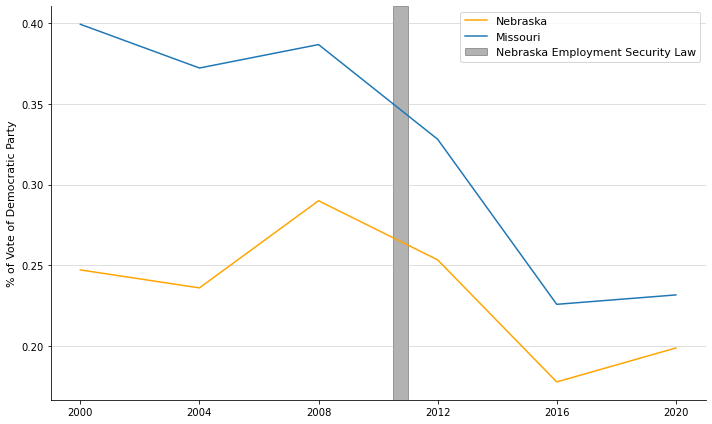

In [82]:
fig, ax = plt.subplots(figsize=(10,6))

ax.spines[["top", "right"]].set_visible(False)
ax.set_xticks([2000, 2004, 2008, 2012, 2016, 2020])
ax.axvspan(2010.5, 2011, color="black", alpha=0.3, label="Nebraska Employment Security Law")
ax.plot(neb_vote_mean.index, neb_vote_mean.values, color="orange", label="Nebraska")
ax.plot(miss_vote_mean.index, miss_vote_mean.values, label="Missouri")
ax.set_ylabel("% of Vote of Democratic Party", fontsize=11)
ax.legend(fontsize=11)
ax.grid(axis="y", alpha=0.5)
plt.tight_layout()
# plt.savefig("econ452_parallel_trends", facecolor="white", dpi=300)